# Time traveling

We will import the required modules

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
import tiledb

In [13]:
# clean up previous runs
array_uri = "arrays/timeseries"

try:
    shutil.rmtree(array_uri)
except:
    pass

We will create the array schema and populate the data using the `timestamp` parameter

In [14]:

dom = tiledb.Domain(
    tiledb.Dim(name="x", domain=(0, 12), tile=5, dtype=np.int32),
    tiledb.Dim(name="y", domain=(0, 12), tile=5, dtype=np.int32))
att = tiledb.Attr(name="val", dtype=np.ubyte)

schema = tiledb.ArraySchema(domain=dom, attrs=(att,))

tiledb.DenseArray.create(array_uri, schema)

for fragment_idx in range(4):
    ts = fragment_idx + 1
    with tiledb.open(array_uri, mode="w", timestamp=ts) as arr:
        x_start = fragment_idx * 3
        y_start = fragment_idx * 3
        x_end = x_start + 3
        y_end = y_start + 3
        arr[x_start:x_end, y_start:y_end] = 1

Lets visualize this data by opening the arrays at different timestamps, starting with the last timestamp, we will get all the data

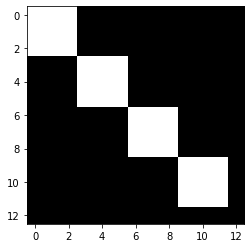

In [17]:
with tiledb.open(array_uri) as arr:
    data = arr[:, :]
    
plt.imshow(data["val"], cmap="Greys")

Or we query for the data at the actual timestamp

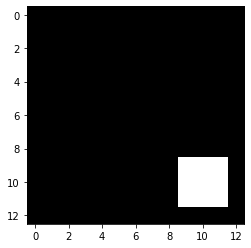

In [20]:
with tiledb.open(array_uri, timestamp=(4,4)) as arr:
    data = arr[:, :]
    
plt.imshow(data["val"], cmap="Greys")

Or any interval thereof

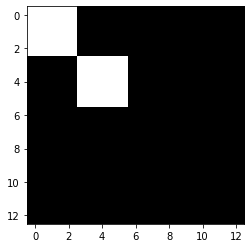

In [21]:
with tiledb.open(array_uri, timestamp=2) as arr:
    data = arr[:, :]
    
plt.imshow(data["val"], cmap="Greys")